In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

**Q: Plot the minimum-tracking-error frontier generated by the ten industry portfolios, with expected return deviation on the vertical axis and tracking error on the horizontal axis. This plot should cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005%**

In [3]:
industryData = pd.read_excel("Industry_Portfolios.xlsx")
marketData = pd.read_excel("Market_Portfolio.xlsx")

/Users/gab/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
#minus market porfolio to get the deviation
industryData.loc[:,'NoDur':] = industryData.loc[:,'NoDur':].apply(lambda x: x - marketData['Market'])
industryData

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
1,200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
2,200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
3,200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
4,200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
116,201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
117,201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30
118,201311,-1.83,-1.31,-0.17,-2.27,0.53,-2.85,0.55,1.42,-4.93,1.62


In [5]:
#Covariance Matrix
covMatrixTemp = industryData.loc[:,'NoDur':].cov()
#Changing to array
covMatrix = covMatrixTemp.to_numpy()

In [6]:
##Vector of mean expectation deviation
dataMeanTemp = industryData.loc[:,'NoDur':].mean()
#changing to Array
dataMean = dataMeanTemp.to_numpy().reshape(10,1)

In [7]:
covMatrixInverse = np.linalg.pinv(covMatrix)
e = np.ones((10,1), dtype=int)
ePrime =  np.ones((1,10), dtype=int)
datameanTrans  = dataMean.reshape(1,10)

In [8]:
import decimal
alpha = np.matmul(np.matmul(datameanTrans,covMatrixInverse),e).item()
zeta = np.matmul(np.matmul(datameanTrans,covMatrixInverse),dataMean).item()
delta = np.matmul(np.matmul(ePrime,covMatrixInverse),e).item()

In [9]:
import math
#Using a smaller step of 0.0025 to get a nicer graph
l = [i for i in np.arange(0, 0.1, 0.0025)]
expectedReturnList = []
stdList = []
stdList2 = []
globMinVarReturn = alpha / delta
for x in l:
    x = round(x,5)
    tempVar = 1/delta + delta / (zeta * delta - (alpha)**2) * (x - globMinVarReturn)**2
    tempStd = math.sqrt(tempVar)
    stdList.append(tempStd)
    expectedReturnList.append(x)

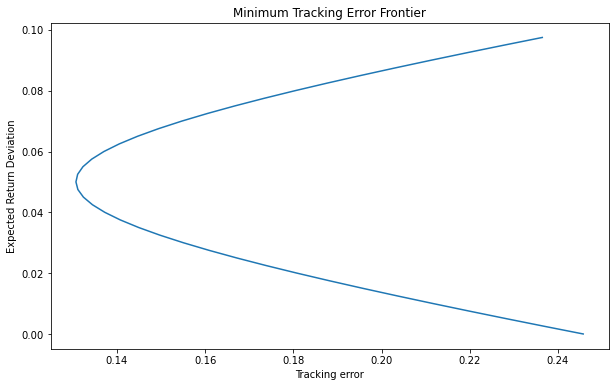

In [10]:
plt.figure(figsize = (10, 6))
plt.plot(stdList,expectedReturnList)
plt.xlabel("Tracking error")
plt.ylabel("Expected Return Deviation")
plt.title("Minimum Tracking Error Frontier")
plt.show()

**Q: Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier, and calculate the information ratio and portfolio weights for the "tangency" portfolio.**

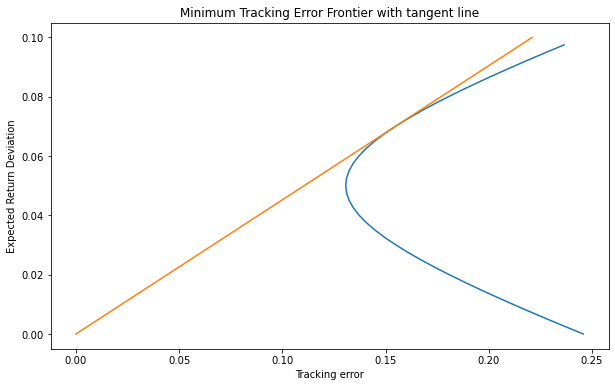

In [11]:
teSquare =  (0.1 - 0)**2 / (zeta - 2*alpha*0 + delta * 0**2)
te =   math.sqrt(teSquare)
risklessAssetStd = [0,te]
risklessAssetRet = [0, 0.1]

plt.figure(figsize = (10, 6))

plt.plot(stdList,expectedReturnList )
plt.plot(risklessAssetStd,risklessAssetRet)

plt.xlabel("Tracking error")
plt.ylabel("Expected Return Deviation")
plt.title("Minimum Tracking Error Frontier with tangent line")

plt.show()

In [12]:
#Calculation of Information Ratio
informationRatio = (zeta - 2 * alpha * 0 + delta *(0)**2)**0.5
informationRatio

0.45248753961993354

In [13]:
#Calculation of tangency portfolio weights
tanPortReturn = (alpha *0 - zeta)/ (delta * 0 - alpha)

#knowing w* = a + b * Rp
atemp1 =  zeta * np.matmul(covMatrixInverse,e) - alpha * np.matmul(covMatrixInverse,dataMean)
atemp2 = zeta * delta - alpha*alpha
a = atemp1/atemp2

btemp1 = delta * np.matmul(covMatrixInverse,dataMean) - alpha * np.matmul(covMatrixInverse,e)
b = btemp1 / atemp2

portfolioWeights = a + b * tanPortReturn
portfolioWeights
sectorList = list(industryData.loc[:,'NoDur':].describe().loc[['mean','std']].T.index)
tempDf = pd.DataFrame(portfolioWeights,sectorList,['Weights'])
tempDf

,Weights
NoDur,0.052634
Durbl,0.000153
Manuf,0.137627
Enrgy,0.087032
HiTec,0.179353
Telcm,0.071074
Shops,0.106884
Hlth,0.102776
Utils,0.040162
Other,0.222304


**Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].**

**Randomly draw each element of w, the vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 100 000 data points.**

**Q: Plot the data points with mean return on the vertical axis and standard deviation of return on the horizontal axis to show the minimum-variance frontier**

In [14]:
industryData2 = pd.read_excel("Industry_Portfolios.xlsx")

/Users/gab/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [15]:
#calculating mean return
mean = industryData2.loc[:,'NoDur':].describe().loc[['mean']].T['mean'].values
#calculating covariance table
covMatrixTemp = industryData2.loc[:,'NoDur':].cov()
#Changing to array
covMatrix = covMatrixTemp.to_numpy()

In [16]:
# Let n be the number of times the monte carlo simulation is going to run for
n = 200000
wMean = np.zeros(n)
wStd = np.zeros(n)
sharpe = np.zeros(n)

wInverseMean = np.zeros(n)
wInverseStd = np.zeros(n)
sharpeInverse = np.zeros(n)

#Monte carlo for 500000

for i in range(n):
    #Generating random weight
    temp = np.random.rand(10)
    
    #Calculating using w
    tempSum = temp.sum()
    w = temp/tempSum
    tempMean = np.sum(mean*w)
    tempStd = np.sqrt(w.T @ (covMatrix @ w))  
    wMean[i] = (tempMean)
    wStd[i] = (tempStd)
    sharpe[i] = wMean[i] / wStd[i]
    
    #Calculating using w inverse
    tempInverse = temp**-1
    tempInverseSum = tempInverse.sum()
    wInverse = tempInverse / tempInverseSum
    tempInverseMean = np.sum(mean*wInverse)
    #tempInverseStd = np.sqrt(np.dot(wInverse.T, np.dot(covMatrix, wInverse)))
    tempInverseStd = np.sqrt(wInverse.T @ (covMatrix@wInverse))
    wInverseMean[i] = tempInverseMean
    wInverseStd[i] = tempInverseStd
    sharpeInverse[i] = wInverseMean[i] / wInverseStd[i]


Text(0.5, 1.0, 'Minimum Variance Frontier')

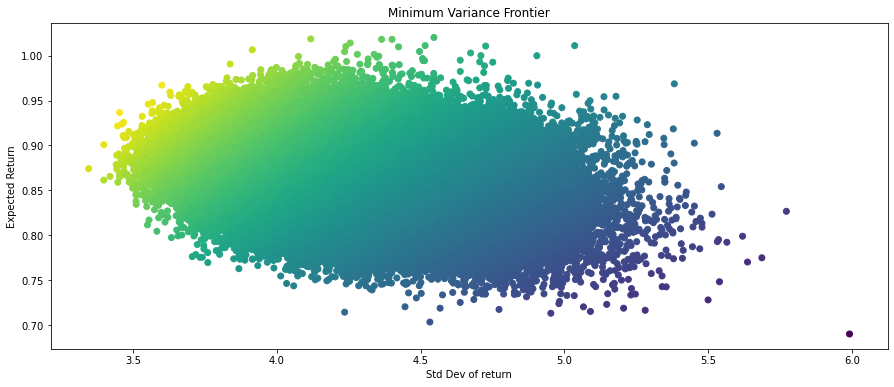

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
plt.scatter(wStd,wMean, c = sharpe )
ax.set_xlabel('Std Dev of return')
ax.set_ylabel('Expected Return')
ax.set_title('Minimum Variance Frontier')

**Repeat this entire process by simulating 1/w using the standard uniform distribution: i.e., take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.**

**Q: Plot the new data points to show the minimum-variance frontier on a separate graph.**

Text(0.5, 1.0, 'Minimum Variance Frontier')

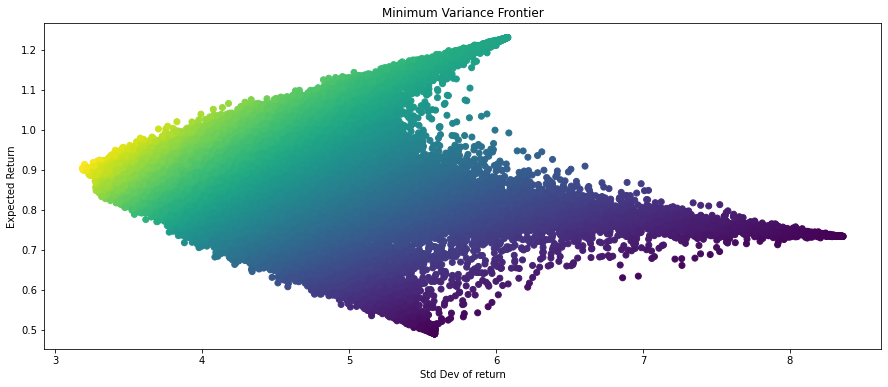

In [18]:

fig, ax = plt.subplots(figsize=(15,6))
plt.scatter(wInverseStd,wInverseMean,c = sharpeInverse )
ax.set_xlabel('Std Dev of return')
ax.set_ylabel('Expected Return')
ax.set_title('Minimum Variance Frontier')
